### Package Imports


In [3]:
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#import torch
#from torch.utils.data import Dataset
plt.style.use('ggplot')

### Data Import

In [ ]:
train_emocause_df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/train_emocause_data.csv")
train_emocause_df[:10]

,conversation_ID,emotion_ID,emotion,cause_ID,cause
0,1,3,surprise,1,I realize I am totally naked .
1,1,3,surprise,3,"Then I look down , and I realize there is a ph..."
2,1,4,surprise,1,I realize I am totally naked .
3,1,4,surprise,3,"Then I look down , and I realize there is a ph..."
4,1,4,surprise,4,Instead of ...
5,1,5,anger,1,I realize I am totally naked .
6,1,5,anger,3,"Then I look down , and I realize there is a ph..."
7,1,5,anger,4,Instead of ...
8,2,1,sadness,1,I do not want to be single
9,2,3,surprise,3,Rachel ? !


### Preprocess Data

In [ ]:
def preprocess(text):
    # convert all lowercase
    new_str = text.lower()
    # convert all occurrences of the following markup strings in the tweet message:
    # \&quot; \&amp; \&gt; and \&lt into white space characters
    new_str = re.sub('&quot;|&amp;|&gt;|&lt;', " ", new_str)
    #replace every occurrence of the following special characters in the tweet message
    new_str = re.sub(r'[\t,;\"!\"\?\"+\=\*\|\(\)\[\]\{}]', " ", new_str)
    new_str = re.sub(re.compile('(?:\.){2,}')," ",new_str)
    new_str = re.sub(re.compile('(?:\.\s|^\s+|\s+$)'), " ", new_str)
    new_str = re.sub(r'^\.+|\.+$', ' ', new_str)
    new_str = re.sub(re.compile('(?:\s){2,}')," ",new_str)
    new_str = re.sub(re.compile('<.*?>'), '', new_str)
    new_str = new_str.strip() # remove any extra whitespace at the end of the line
    return new_str

In [ ]:
train_emocause_df['cause'] = train_emocause_df['cause'].apply(preprocess)
train_emocause_df['cause'].values

array(['i realize i am totally naked',
       'then i look down and i realize there is a phone there',
       'i realize i am totally naked', ...,
       'that may have missed the table',
       'i never sucked i actually did not want you to know how good i was',
       'now we can enter into doubles tournaments'], dtype=object)

### Emotion Training Data Distribution

Text(0, 0.5, 'Number of utterances')

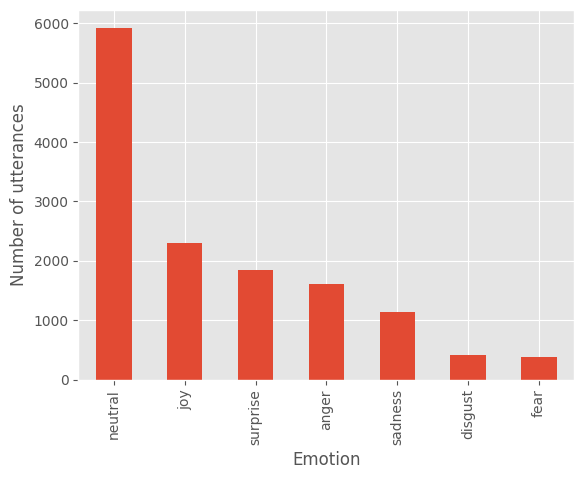

In [ ]:
emotion_bar = train_emo_df["emotion"].value_counts().plot(kind='bar')
emotion_bar.set_xlabel("Emotion")
emotion_bar.set_ylabel("Number of utterances")

### Custom Dataset for Dataloader

In [ ]:
class CustomDataset(Dataset):
    def __init__(self) -> None:
        super().__init__()
        pass
    
    def __len__(self):
        pass

    def __getitem__(self, idx):
        pass